In [1]:
cd ..

/home/dmitriishubin/Desktop/Thesis/HepaticVessel_experiment


In [5]:
import pandas as pd
import numpy as np
import pydicom as dicom
import nibabel as nib
import os
from sklearn.model_selection import KFold,train_test_split
import json
import matplotlib.pyplot as plt

In [14]:
img = nib.load('../data/Task02_Heart/imagesTr/la_010.nii.gz')
img = np.array(img.dataobj)

seg = nib.load('../data/Task02_Heart/labelsTr/la_003.nii.gz')
seg = np.array(seg.dataobj)

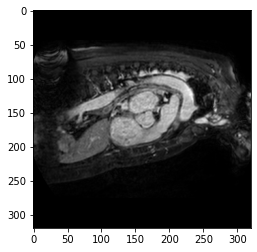

In [15]:
plt.imshow(img[:,:,60],cmap='gray')

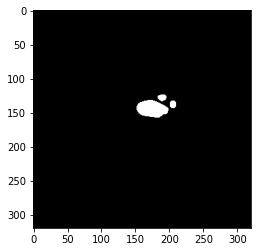

In [11]:
plt.imshow(seg[:,:,60],cmap='gray')

In [8]:
img.shape

(320, 320, 130)

In [5]:
patients = [i for i in os.listdir('../data/Task02_Heart/imagesTr/') if i.find('._la')==-1]

In [6]:
patients

['la_026.nii.gz',
 'la_005.nii.gz',
 'la_007.nii.gz',
 'la_019.nii.gz',
 'la_009.nii.gz',
 'la_016.nii.gz',
 'la_004.nii.gz',
 'la_022.nii.gz',
 'la_018.nii.gz',
 'la_014.nii.gz',
 'la_011.nii.gz',
 'la_010.nii.gz',
 'la_024.nii.gz',
 'la_020.nii.gz',
 'la_023.nii.gz',
 'la_029.nii.gz',
 'la_030.nii.gz',
 'la_003.nii.gz',
 'la_021.nii.gz',
 'la_017.nii.gz']

In [21]:
patients[0][:-7]

'la_026'

In [28]:
names = []

os.makedirs('../data/Task02_Heart/processed_data',exist_ok=True)

count = 0

for patient in patients:
    img = nib.load(f'../data/Task02_Heart/imagesTr/{patient}')
    img = np.array(img.dataobj)
    seg = nib.load(f'../data/Task02_Heart/labelsTr/{patient}')
    seg = np.array(seg.dataobj)
    
    patient = patient[:-7]
    
    os.makedirs(f'../data/Task02_Heart/processed_data/{patient}',exist_ok=True)
    
    for i in range(img.shape[-1]):
        temp_img = img[:,:,i].reshape(320, 320,1)
        temp_seg = seg[:,:,i].reshape(320, 320,1)
        
        
        np.save(f'../data/Task02_Heart/processed_data/{patient}/{i}.npy',temp_img)
        np.save(f'../data/Task02_Heart/processed_data/{patient}/{i}_seg.npy',temp_seg)
        count+=1
            

In [7]:
for index,patient in enumerate(patients):
    patients[index]=patient[:-7]

In [36]:
patients = np.array(patients)

kf = KFold(5,shuffle=True,random_state=42)
for fold,(train_index, test_index) in enumerate(kf.split(patients)):
    patients_train, patients_test = patients[train_index], patients[test_index]
    
    images_train = []
    for patient in patients_train:
        images_train+=[
                f'../data/Task02_Heart/processed_data/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/Task02_Heart/processed_data/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]
    
    
    images_val = []
    for patient in patients_test:
        images_val+=[
                f'../data/Task02_Heart/processed_data/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/Task02_Heart/processed_data/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]
        
    
    split = {
        'train': images_train,
        'val': images_val,
    }
    
    
    with open(f'../data/split_table/{fold}_split_table.json', 'w') as outfile:
            json.dump(split, outfile)

In [8]:
patients = np.array(patients)

for fold in range(5):

    patients_train, patients_test = train_test_split(patients, test_size=0.3, random_state=fold)

    patients_train, patients_val = train_test_split(patients_train, test_size=0.45, random_state=fold)

    images_train = []
    for patient in patients_train:
        images_train+=[
                f'../data/Task02_Heart/processed_data/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/Task02_Heart/processed_data/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]


    images_val = []
    for patient in patients_val:
        images_val+=[
                f'../data/Task02_Heart/processed_data/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/Task02_Heart/processed_data/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]

    images_test = []
    for patient in patients_test:
        images_test+=[
                f'../data/Task02_Heart/processed_data/{patient}/'+i[:-4]
                for i in sorted(os.listdir(f'../data/Task02_Heart/processed_data/{patient}/'))
                if i.find('.npy') != -1 and i.find('seg') == -1
            ]


    split = {
        'train': images_train,
        'val': images_val,
        'test': images_test,
    }


    with open(f'../data/split_table/{fold}_split_table.json', 'w') as outfile:
            json.dump(split, outfile)

In [10]:
len(patients_train)

7

In [11]:
len(patients_val)

7

In [9]:
len(patients_test)

6

In [19]:
f'../data/Task02_Heart/processed_data/{patients_train}/'

"../data/Task02_Heart/processed_data/['la_007' 'la_019' 'la_009' 'la_016' 'la_004' 'la_022' 'la_018' 'la_014'\n 'la_011' 'la_010' 'la_024' 'la_020' 'la_023' 'la_030' 'la_021' 'la_017']/"